In [475]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import math

In [476]:
#setting the future colors to be used to 4 for the centroids and opening parrot.jpg
colors = 4
image_name = "parrot.jpg"
bird = Image.open(image_name)

In [477]:
#setting bird to the numpy array of the bird image
bird = np.array(bird)

In [478]:
#setting w, h, d variables and keeping d as 3, then reshaping the bird array and naming it bird_array_reshaped
w, h, d = bird.shape
d = 3
bird_array_reshaped = np.reshape(bird, (w * h, d))

In [479]:
#setting kmeans to k, 4 clusters/centroids and fitting it to the reshaped array
kmeans = KMeans(n_clusters=colors, n_init='auto')
kmeans.fit(bird_array_reshaped)

KMeans(n_clusters=4, n_init='auto')

In [480]:
#compressing the image using kmeans
comp_bird = kmeans.cluster_centers_[kmeans.labels_]
comp_bird = np.clip(comp_bird.astype('uint8'), 0, 255)

In [481]:
#reshaping it back to the size of the original image
comp_img = comp_bird.reshape(w, h, d)

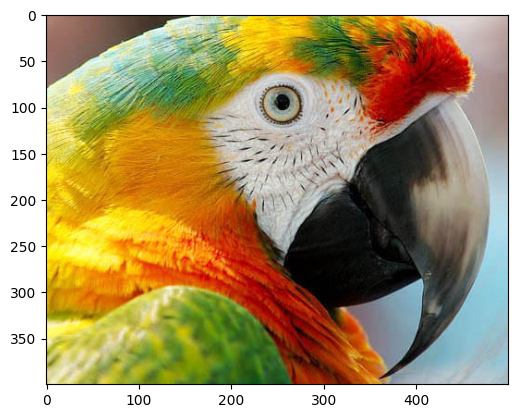

In [482]:
#displaying original
plt.imshow(bird)

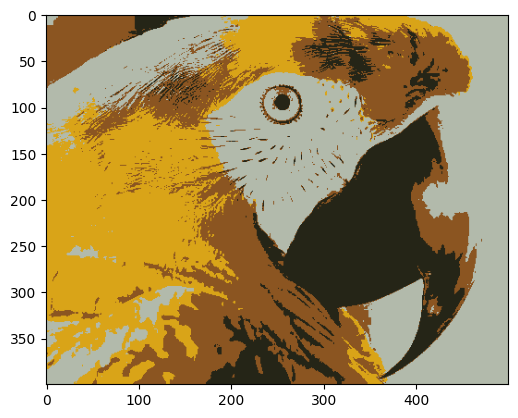

In [483]:
#printing kmeans compressed image
plt.imshow(comp_img)

In [484]:
#image size calculation in bits
original_image_size = w * h * 24
compressed_image_size = 24 * colors + w * h * math.log2(8)

print(f'Original image size in bits: {original_image_size}')
print(f'Compressed image size in bits: {compressed_image_size}')

Original image size in bits: 4800000
Compressed image size in bits: 600096.0


In [485]:
#Compression rate calculation
print(f'Compression rate: {(1 - (compressed_image_size / original_image_size)) * 100}%')

Compression rate: 87.498%
